In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:.3f}'.format

### Bu datamızda hasta olanları 1 leri tespite odaklanacağız : 

In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

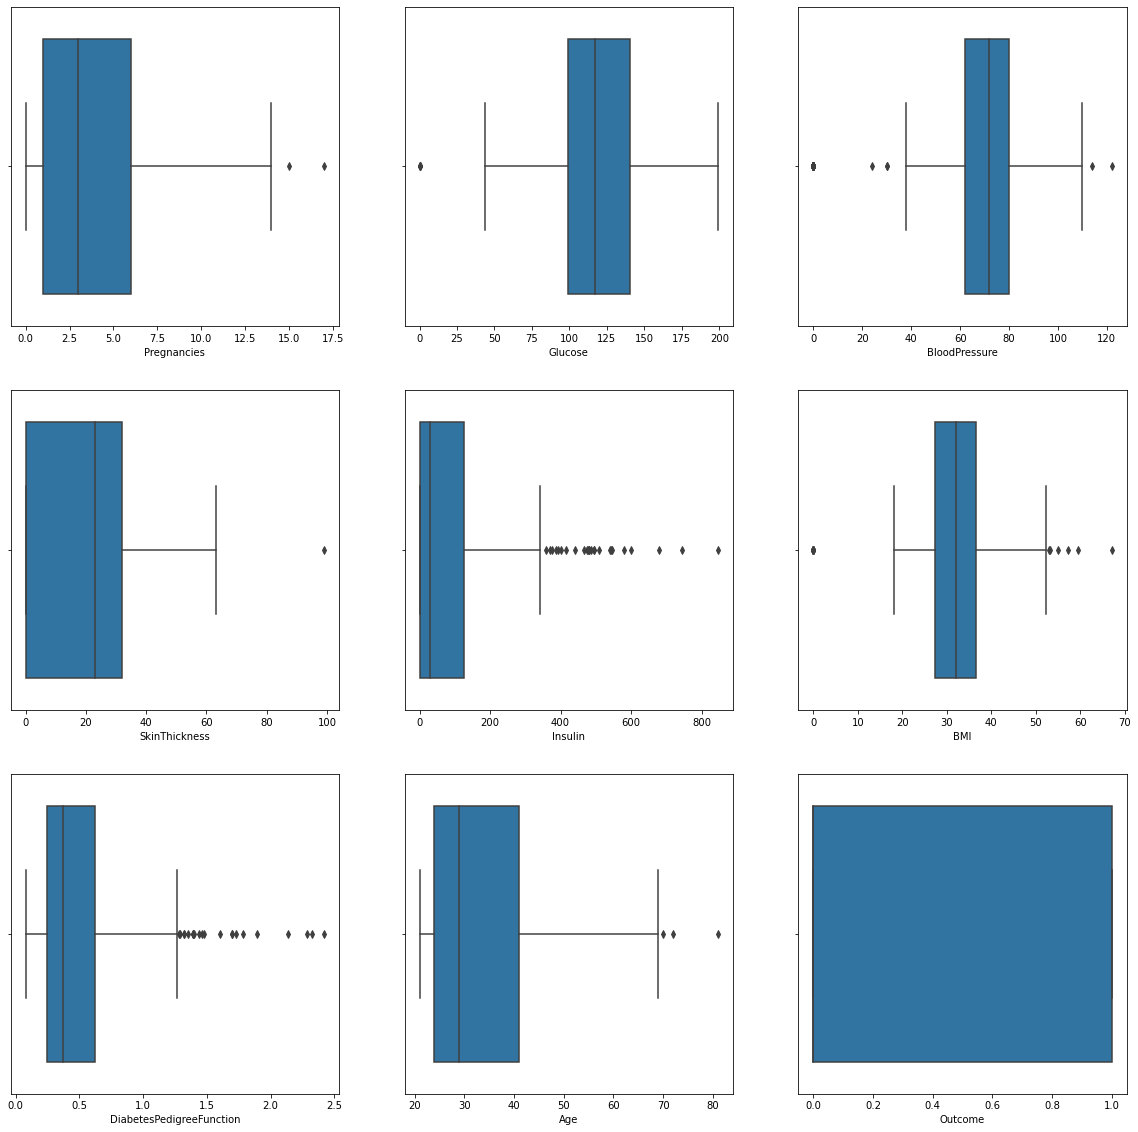

In [7]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes([float, int]).columns:
    index += 1
    plt.subplot(3,3,index)
    sns.boxplot(df.select_dtypes([float, int])[i], whis=1.7)

In [11]:
for i in df.select_dtypes([float, int]).columns:
    if i == "DiabetesPedigreeFunction" and i == "Insulin" :
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(3.0*IQR)
        ust_sinir = Q3+(3.0*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        
        
    elif  i == "BloodPressure" and i == "BMI" and i == "Age" :
            Q1 = df[i].quantile(0.25)
            Q3 = df[i].quantile(0.75)
            IQR = Q3-Q1
            alt_sinir = Q1-(1.9*IQR)
            ust_sinir = Q3+(1.9*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
            aykiri_alt = df[i] < alt_sinir
            aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
            df[i][aykiri_alt] = alt_sinir
            df[i][aykiri_ust] = ust_sinir
    
    else : 
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.7*IQR)
        ust_sinir = Q3+(1.7*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir

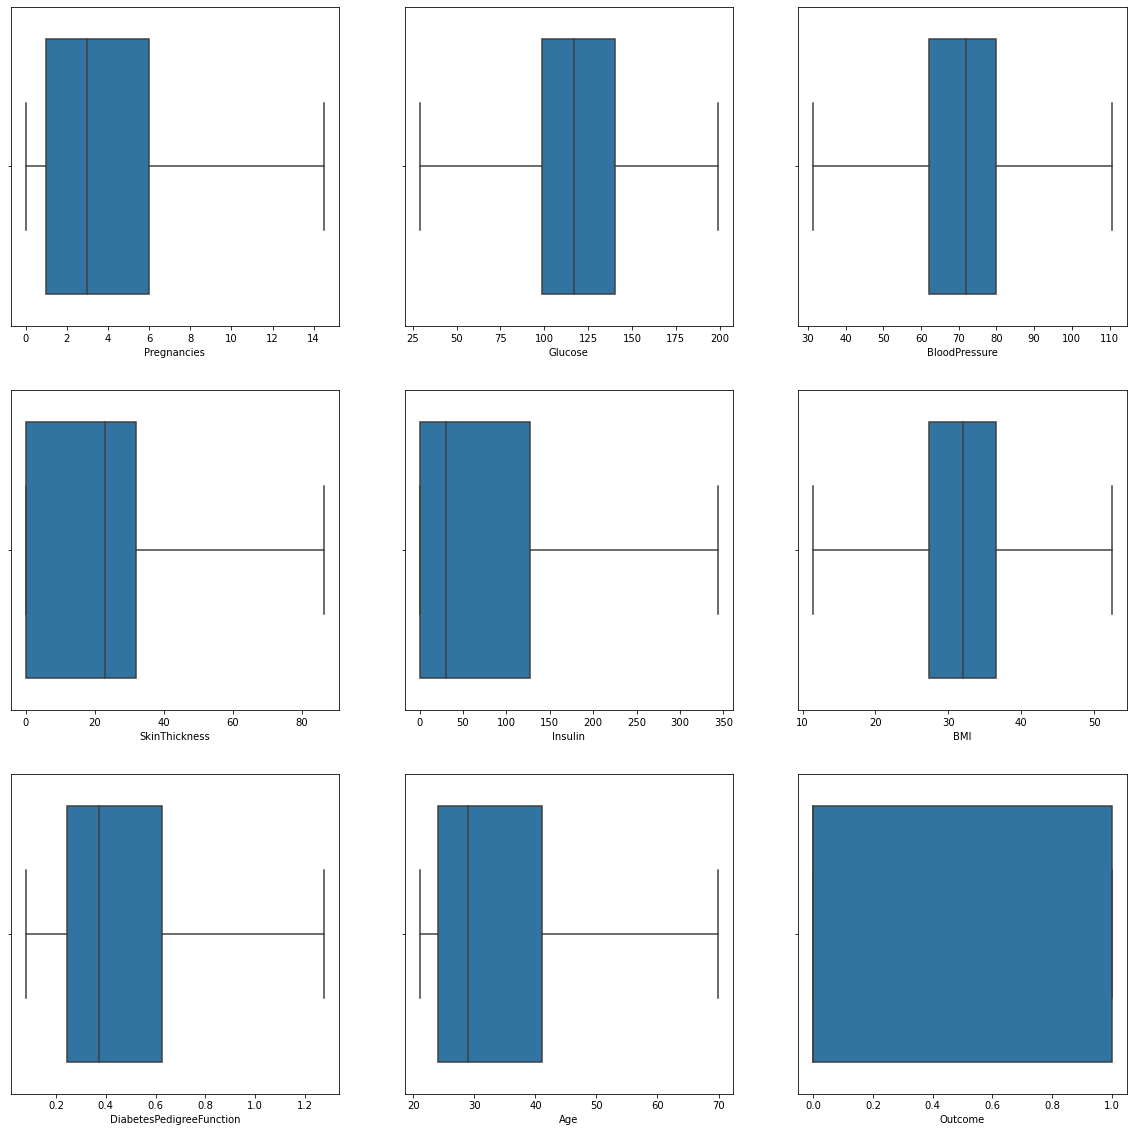

In [12]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes([float, int]).columns:
    index += 1
    if i == "DiabetesPedigreeFunction" and i == "Insulin" :
        plt.subplot(3,3,index)
        sns.boxplot(df.select_dtypes([float, int])[i], whis=3.0)
        
    elif  i == "BloodPressure" and i == "BMI" and i == "Age" : 
        plt.subplot(3,3,index)
        sns.boxplot(df.select_dtypes([float, int])[i], whis=1.9)
        
    else : 
        plt.subplot(3,3,index)
        sns.boxplot(df.select_dtypes([float, int])[i], whis= 1.7)

In [13]:
df.corr()["Outcome"].drop("Outcome").sort_values()

SkinThickness              0.074
BloodPressure              0.108
Insulin                    0.126
DiabetesPedigreeFunction   0.184
Pregnancies                0.221
Age                        0.241
BMI                        0.308
Glucose                    0.477
Name: Outcome, dtype: float64

### Train Test Split : 

In [14]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
# stratify = y diyerek hasta olanlar ve olmayanlar arasında ki dengesizliği ortadan kaldırmak için.

### Metrics : 

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, accuracy_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [26]:
grid_model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

### Logistic_Regression and Pipline : 

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C = 0.1, class_weight= "balanced", penalty = "l1",
                                                                            solver= "liblinear", random_state = 42))]
Pipeline(steps=operations)
logpip_model = Pipeline(steps=operations)
logpip_model.fit(X_train, y_train)
eval_metric(logpip_model, X_train, y_train, X_test, y_test)

Test_Set
[[72 28]
 [12 42]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.60      0.78      0.68        54

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.74      0.75       154


Train_Set
[[306  94]
 [ 54 160]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       400
           1       0.63      0.75      0.68       214

    accuracy                           0.76       614
   macro avg       0.74      0.76      0.74       614
weighted avg       0.77      0.76      0.76       614



### Cross Validate : 

In [30]:
from sklearn.model_selection import cross_validate

model = LogisticRegression(C = 0.1, class_weight= "balanced", penalty = "l1", solver= "liblinear", random_state = 42)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.599
test_recall      0.728
test_f1          0.652
test_accuracy    0.730
dtype: float64

### Knn Model : 

#### Best k value Elbow Method :

In [38]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = range(1,23)

list_dist = []
list_score = []
sayac = 1
for k in k_range : 
    model = KNeighborsClassifier(n_neighbors= k)
    model.fit(X_train_scaled, y_train)
    #print(sayac , "Doğruluk oranı = % ", model.score(X_train_scaled, y_train)*100)
    sayac = sayac + 1
    list_dist.append(sayac-1)
    list_score.append(round(model.score(X_train_scaled, y_train)*100,2))
list_score = pd.DataFrame(list_score)  
list_dist = pd.DataFrame(list_dist)
train_k = pd.concat([list_dist, list_score], axis=1)
train_k.columns = ["k_value_train", "score_train"]
train_k

list_dist1 = []
list_score1 = []
index = 1
for k in k_range : 
    model2 = KNeighborsClassifier(n_neighbors= k)
    model2.fit(X_train_scaled, y_train)
    #print(sayac , "Doğruluk oranı = % ", model.score(X_train_scaled, y_train)*100)
    index = index + 1
    list_dist1.append(index-1)
    list_score1.append(round(model2.score(X_test_scaled, y_test)*100,2))
list_score1 = pd.DataFrame(list_score1)  
list_dist1 = pd.DataFrame(list_dist1)
test_k = pd.concat([list_dist1, list_score1], axis=1)
test_k.columns = ["k_value_test", "score_test"]
scores = pd.concat([test_k, train_k], axis=1)
scores["result"] = scores["score_train"] - scores["score_test"]
scores

,k_value_test,score_test,k_value_train,score_train,result
0,1,67.530,1,100.000,32.470
1,2,73.380,2,84.040,10.660
2,3,72.080,3,84.850,12.770
3,4,68.830,4,80.460,11.630
4,5,71.430,5,81.920,10.490
5,6,76.620,6,79.800,3.180
6,7,74.680,7,78.990,4.310
7,8,75.320,8,80.130,4.810
8,9,78.570,9,80.130,1.560
9,10,76.620,10,79.640,3.020


In [39]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors = 9, p = 2, weights = "uniform"))]

Pipeline(steps=operations)

knnpip_model = Pipeline(steps=operations)
knnpip_model.fit(X_train, y_train)
eval_metric(knnpip_model, X_train, y_train, X_test, y_test)

# n_neighbors': 25, 'knn__p': 1, 'knn__weights': 'uniform'

Test_Set
[[88 12]
 [21 33]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       100
           1       0.73      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154


Train_Set
[[362  38]
 [ 84 130]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       400
           1       0.77      0.61      0.68       214

    accuracy                           0.80       614
   macro avg       0.79      0.76      0.77       614
weighted avg       0.80      0.80      0.79       614



### Cross Validate : 

In [41]:
from sklearn.model_selection import cross_validate

operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9, p = 2, weights = "uniform"))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.701
test_recall      0.532
test_f1          0.601
test_accuracy    0.756
dtype: float64

### ROC and AUC : 

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

#### 1- Logistic Regression : 

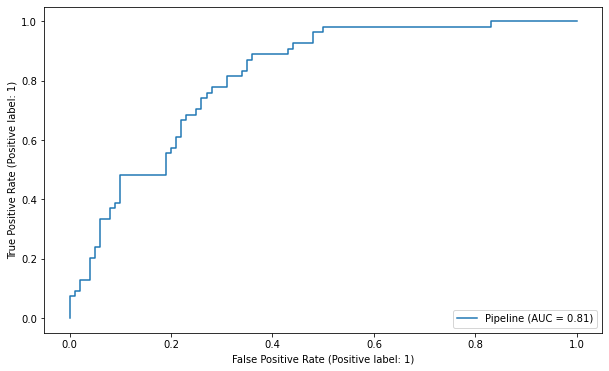

In [43]:
plot_roc_curve(logpip_model, X_test, y_test, pos_label=1);

### Data Imbalanced Olduğu için :  plot_precision_recall_curve

In [44]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

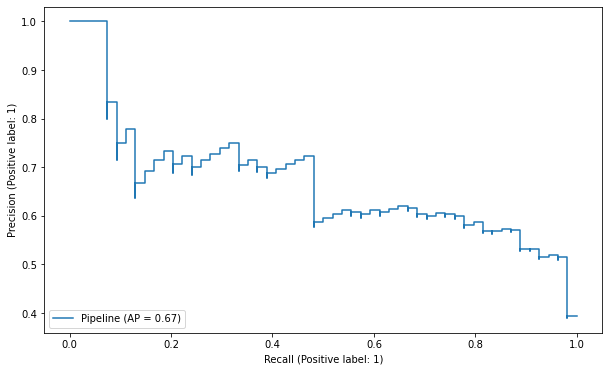

In [45]:
plot_precision_recall_curve(logpip_model, X_test, y_test);


### Logistic Default Values Best Threshold : 

In [65]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(random_state = 42))]
Pipeline(steps=operations)
log_model = Pipeline(steps=operations)
log_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(random_state=42))])

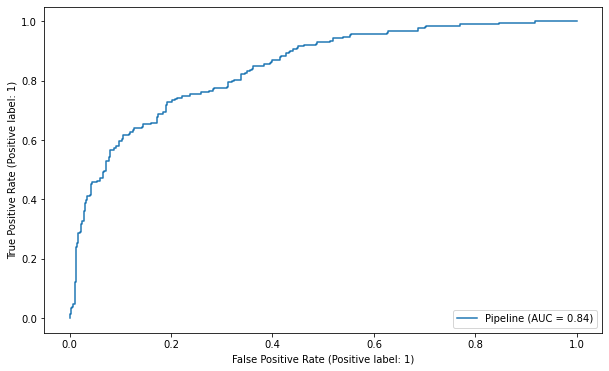

In [66]:
plot_roc_curve(log_model, X_train, y_train);

In [69]:
y_pred_proba = log_model.predict_proba(X_train)
roc_auc_score(y_train, y_pred_proba[:,1])

0.8439485981308412

In [70]:
# Dengesiz veri seti olduğu için bir de burda hesapladık : 

precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.35913286441565073

In [71]:
y_pred2 = pd.Series(logpip_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[60 40]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.91      0.60      0.72       100
           1       0.55      0.89      0.68        54

    accuracy                           0.70       154
   macro avg       0.73      0.74      0.70       154
weighted avg       0.78      0.70      0.71       154



In [72]:
y_train_pred = pd.Series(logpip_model.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[225 175]
 [ 22 192]]
              precision    recall  f1-score   support

           0       0.91      0.56      0.70       400
           1       0.52      0.90      0.66       214

    accuracy                           0.68       614
   macro avg       0.72      0.73      0.68       614
weighted avg       0.78      0.68      0.68       614



### plot_roc_curve KNN : 

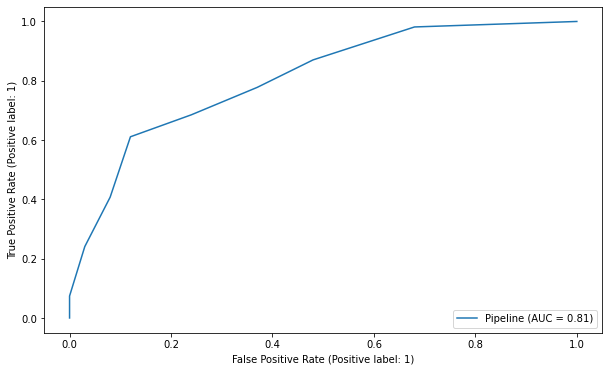

In [73]:
plot_roc_curve(knnpip_model, X_test, y_test);

### Default KNN Best Threshold : 

In [74]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
Pipeline(steps=operations)
knn_model = Pipeline(steps=operations)
knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

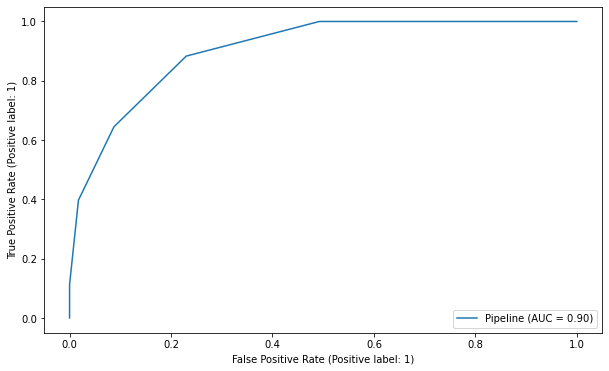

In [75]:
plot_roc_curve(knn_model, X_train, y_train);

In [76]:
y_pred_proba = knn_model.predict_proba(X_train)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9044684579439253

In [77]:
# Dengesiz veri seti olduğu için bir de burda hesapladık : 

precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4

In [78]:
y_pred2 = pd.Series(knnpip_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[76 24]
 [17 37]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



In [79]:
y_train_pred = pd.Series(knnpip_model.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[322  78]
 [ 61 153]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       400
           1       0.66      0.71      0.69       214

    accuracy                           0.77       614
   macro avg       0.75      0.76      0.76       614
weighted avg       0.78      0.77      0.78       614



###  Tree Models : 

### 1- Decision Tree : 

In [119]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth= 5, splitter= "best", max_features = 8, 
                                  min_samples_leaf = 5)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[84 16]
 [15 39]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       100
           1       0.71      0.72      0.72        54

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154


Train_Set
[[327  73]
 [ 43 171]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       400
           1       0.70      0.80      0.75       214

    accuracy                           0.81       614
   macro avg       0.79      0.81      0.80       614
weighted avg       0.82      0.81      0.81       614



### Cross Validate : 

In [134]:
model = DecisionTreeClassifier(random_state=42, max_depth= 5, splitter= "best", max_features = 8, 
                                  min_samples_leaf = 5)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.612
test_recall      0.472
test_f1          0.526
test_accuracy    0.707
dtype: float64

### 2- Random Forest :

In [129]:
from sklearn.ensemble import RandomForestClassifier

rnd_model = RandomForestClassifier(class_weight= "balanced", criterion="gini", max_depth = 3, max_features = None,
                                  n_estimators = 64, random_state = 42)

rnd_model.fit(X_train, y_train)

eval_metric(rnd_model, X_train, y_train, X_test, y_test)

Test_Set
[[76 24]
 [11 43]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       100
           1       0.64      0.80      0.71        54

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.76       154
weighted avg       0.79      0.77      0.78       154


Train_Set
[[318  82]
 [ 47 167]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       400
           1       0.67      0.78      0.72       214

    accuracy                           0.79       614
   macro avg       0.77      0.79      0.78       614
weighted avg       0.80      0.79      0.79       614



### Cross Validate : 

In [133]:
model = RandomForestClassifier(class_weight= "balanced", criterion="gini", max_depth = 3, max_features = None,
                                  n_estimators = 64, random_state = 42)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.644
test_recall      0.695
test_f1          0.663
test_accuracy    0.753
dtype: float64

### Boosting Models : 

### 1- AdaBoosting : 

In [162]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state = 42, n_estimators= 100, learning_rate= 1.0)
ada_model.fit(X_train, y_train)

eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[84 16]
 [19 35]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.69      0.65      0.67        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154


Train_Set
[[362  38]
 [ 60 154]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       400
           1       0.80      0.72      0.76       214

    accuracy                           0.84       614
   macro avg       0.83      0.81      0.82       614
weighted avg       0.84      0.84      0.84       614



### Cross Validate : 

In [163]:
model = AdaBoostClassifier(random_state = 42, n_estimators= 100, learning_rate= 1.0)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.671
test_recall      0.551
test_f1          0.599
test_accuracy    0.744
dtype: float64

### GradientBoosting : 

In [223]:
from sklearn.ensemble import GradientBoostingClassifier

gr_model = GradientBoostingClassifier(random_state = 42, learning_rate= 2.0, n_estimators= 200, min_samples_split = 3, 
                                      subsample=1.0, max_depth= 3, ccp_alpha= 0.3)
gr_model.fit(X_train, y_train)

eval_metric(gr_model, X_train, y_train, X_test, y_test)

Test_Set
[[100   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154


Train_Set
[[400   0]
 [214   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       400
           1       0.00      0.00      0.00       214

    accuracy                           0.65       614
   macro avg       0.33      0.50      0.39       614
weighted avg       0.42      0.65      0.51       614



### Cross Validate : 

In [242]:
f1_1 = make_scorer(f1_score, pos_label =1)
precision_1 = make_scorer(precision_score, pos_label =1)
recall_1 = make_scorer(recall_score, pos_label =1)

model = GradientBoostingClassifier(random_state = 42, learning_rate= 2.0, n_estimators= 150, min_samples_split = 3, 
                                      subsample=1.0, max_depth= 3)

scores = cross_validate(model, X_train_scaled, y_train,scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}, 
                        cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_1   0.386
test_recall_1      0.542
test_f1_1          0.434
dtype: float64

### XGBoost : 

In [243]:
!pip install xgboost

In [244]:
from xgboost import XGBClassifier

In [304]:
xgb_model = XGBClassifier(random_state = 42, min_child_weight = 7.0, gamma = 5.0, subsample = 0.8, 
                         scale_post_weight = 1.8, reg_alpha = 0, reg_lambda = 1)

xgb_model.fit(X_train, y_train)

eval_metric(xgb_model, X_train, y_train, X_test, y_test)

[16:46:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scale_post_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:46:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test_Set
[[84 16]
 [21 33]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg      

In [301]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[50, 100, 200,300,400],'max_depth':[2,3,4,5], "learning_rate": [0.1, 1.0, 2.0, 3.0, 4.0, 5.0],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

xgb_model = XGBClassifier(random_state=42, min_child_weight = 7.0, gamma = 5.0)

xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "recall", cv=5, n_jobs = -1).fit(X_train, y_train)


[16:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [302]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[  0 100]
 [  0  54]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.35      1.00      0.52        54

    accuracy                           0.35       154
   macro avg       0.18      0.50      0.26       154
weighted avg       0.12      0.35      0.18       154


Train_Set
[[  0 400]
 [  0 214]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.35      1.00      0.52       214

    accuracy                           0.35       614
   macro avg       0.17      0.50      0.26       614
weighted avg       0.12      0.35      0.18       614



In [305]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 5.0,
 'max_depth': 2,
 'n_estimators': 50,
 'subsample': 0.5}

### Default XGBoost Best Threshold : 

Aslında gridsearchcv ile değeri 1 olanları 1 olarak doğru tahmin etmede %100 başarıya ulaştık. bir de test için best threshold belirleyelim. Çünkü train seti için skorlarımız default değerlerde zaten mükemmel ancak test datamızda ki skorlar berbat oldukları için test datası üzerinden best threshold bulunacak.

In [292]:
model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

[16:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

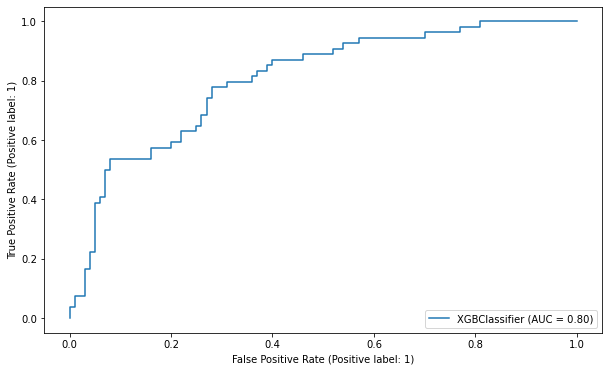

In [308]:
plot_roc_curve(model, X_test, y_test);

#### XGBoosta test için en iyi threshold bulunacak : 

In [313]:
y_pred_proba = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8035185185185185

In [314]:
# Dengesiz veri seti olduğu için bir de burda hesapladık : 

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.18070453

In [316]:
# 1 leri mükemmel bir şeklide tahmin etti : 

y_pred2 = pd.Series(xgb_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[  0 100]
 [  0  54]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.35      1.00      0.52        54

    accuracy                           0.35       154
   macro avg       0.18      0.50      0.26       154
weighted avg       0.12      0.35      0.18       154



### Final Model : 

Hasta olan 40 tane kişi seçelim ve bunlar için tahminde bulunduralım.

In [327]:
data = df[df["Outcome"] == 1].iloc[0:40]

In [335]:
y_tahmin = xgb_grid.predict(X)

In [337]:
print(classification_report(y, y_tahmin))

# hasta olanların tamamı doğru bir şekilde tespit edilmiştir.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.35      1.00      0.52       268

    accuracy                           0.35       768
   macro avg       0.17      0.50      0.26       768
weighted avg       0.12      0.35      0.18       768



In [340]:
value = data.drop("Outcome", axis=1)
target = data["Outcome"]
y_pred = xgb_grid.predict(value)
data["tahmin"] = y_pred

In [341]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,tahmin
0,6.000,148.000,72.000,35.000,0.000,33.600,0.627,50.000,1,1
2,8.000,183.000,64.000,0.000,0.000,23.300,0.672,32.000,1,1
4,0.000,137.000,40.000,35.000,168.000,43.100,1.276,33.000,1,1
6,3.000,78.000,50.000,32.000,88.000,31.000,0.248,26.000,1,1
8,2.000,197.000,70.000,45.000,343.575,30.500,0.158,53.000,1,1
9,8.000,125.000,96.000,0.000,0.000,11.490,0.232,54.000,1,1
11,10.000,168.000,74.000,0.000,0.000,38.000,0.537,34.000,1,1
13,1.000,189.000,60.000,23.000,343.575,30.100,0.398,59.000,1,1
14,5.000,166.000,72.000,19.000,175.000,25.800,0.587,51.000,1,1
15,7.000,100.000,31.400,0.000,0.000,30.000,0.484,32.000,1,1


### SONUÇ : 

Bizden istenen hasta olanların en az hata ile tespit edilmesiydi. Hasta olmayanların tespitini ön plana çıkarmadığımız için bu modelle final yaptık. Ama kanser veya ciddi oranda ağır tedavi gerektiren hasta dataları için yanlış ve hatalı bir modelleme olacaktır. Ama sadece hasta olanların tespiti önemli ise diğer skorlar önemsizse yapılan modelde bu başarılmıştır.